# Example: Fit NHPP models

This notebook loads the bundled MUSA dataset and fits an exponential NHPP model.

In [10]:
# initialize
import importlib.resources as resources

import pandas as pd
import pysrat as srat

In [11]:
data_path = resources.files("pysrat").joinpath("datasets/musa/sys1g.csv")
df = pd.read_csv(data_path)

data = srat.NHPPData.from_counts(
    fault=df["fault"].to_numpy(dtype=float))

In [12]:
models = {
    "Exponential": srat.ExponentialNHPP(),
    "Gamma": srat.GammaNHPP(),
    "Pareto2": srat.Pareto2NHPP(),
    "TruncatedNormal": srat.TruncatedNormalNHPP(),
    "LogNormal": srat.LogNormalNHPP(),
    "TruncatedLogistic": srat.TruncatedLogisticNHPP(),
    "LogLogistic": srat.LogLogisticNHPP(),
    "TruncatedExtremeValueMax": srat.TruncatedExtremeValueMaxNHPP(),
    "LogExtremeValueMax": srat.LogExtremeValueMaxNHPP(),
    "TruncatedExtremeValueMin": srat.TruncatedExtremeValueMinNHPP(),
    "LogExtremeValueMin": srat.LogExtremeValueMinNHPP(),
}
for model in models.values():
    model.fit(data, verbose=True)

exp fit:   0%|          | 0/2000 [00:00<?, ?it/s]/Users/okamu/Documents/pysrat/src/pysrat/_em.py:97: UserWarning: Did not converge to MLE by max iteration.
  warnings.warn("Did not converge to MLE by max iteration.")
tlogis fit:   0%|          | 0/2000 [00:00<?, ?it/s]              /Users/okamu/Documents/pysrat/.venv/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


<Axes: xlabel='time', ylabel='# of faults'>

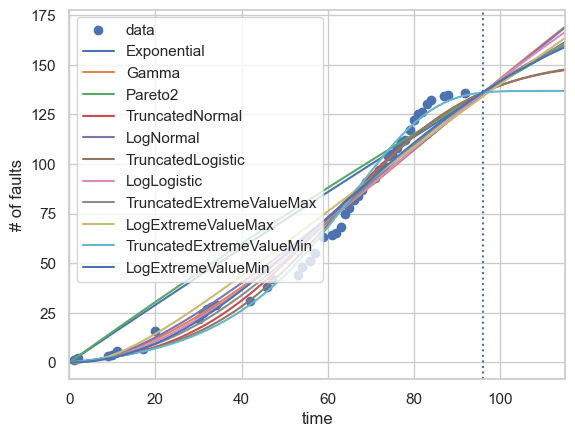

In [13]:
srat.plot_mvf(data, models)

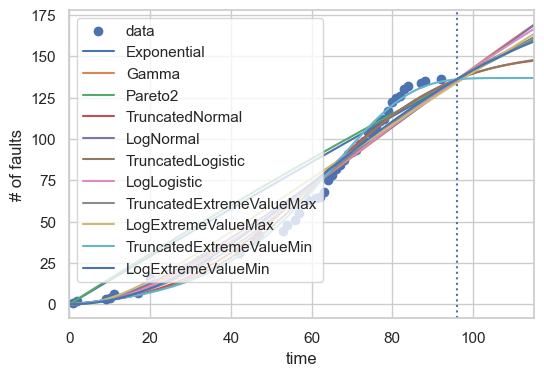

In [14]:
# seaborn example
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(6,4))
srat.plot_mvf(data, models, ax=ax)
plt.show()


<Axes: xlabel='time', ylabel='# of faults'>

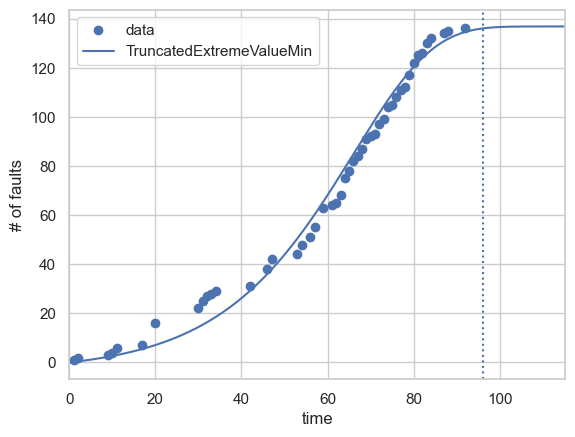

In [25]:
# select the best model by AIC with label
best_key = min(models, key=lambda k: models[k].aic_)
srat.plot_mvf(data, {best_key: models[best_key]})
